### Example on RSofieReader

In [1]:
using namespace TMVA::Experimental;

In [2]:
RSofieReader model("Higgs_trained_model.h5");

Keras Version: 2.9.0
Model has not a defined batch size, assume is 1 - input shape for tensor dense_input : { 1 , 7 }


In [3]:
// for debugging
 
// the input shape for this model is a tensor with shape (1,7)

std::vector<float> input = {1.35376, 0.9795631, 0.97807616, 0.92000484, 0.72165745, 0.98875093, 0.87667835 };

// predict model on a single event (takes a std::vector<float>)

auto output = model.Compute(input);

std::cout << "Event prediction = " << output[0] << "  " << output[1] << std::endl;

Event prediction = 0.739671  0.26728


In [4]:
// predict model now on a input file using RDataFrame

std::string inputFileName = "Higgs_data.root";
std::string inputFile = "http://root.cern.ch/files/" + inputFileName;


In [5]:
 ROOT::RDataFrame df1("sig_tree", inputFile);

auto h1 = df1.Define("DNN_Values", Compute<7, float>(model),
                            {"m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"})
    .Define("y_sig","DNN_Values[0]")            
    .Histo1D({"h_sig", "", 100, 0, 1}, "y_sig");

In [6]:
ROOT::RDataFrame df2("bkg_tree", inputFile);
   auto h2 = df2.Define("DNN_Values", Compute<7, float>(model),
                            {"m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"})
       .Define("y_bkg","DNN_Values[0]")           
       .Histo1D({"h_bkg", "", 100, 0, 1}, "y_bkg");

In [9]:
h1->SetLineColor(kRed);
h2->SetLineColor(kBlue);

auto c1 = new TCanvas();
gStyle->SetOptStat(0);

h1->DrawClone();
h2->DrawClone("SAME");
c1->BuildLegend();


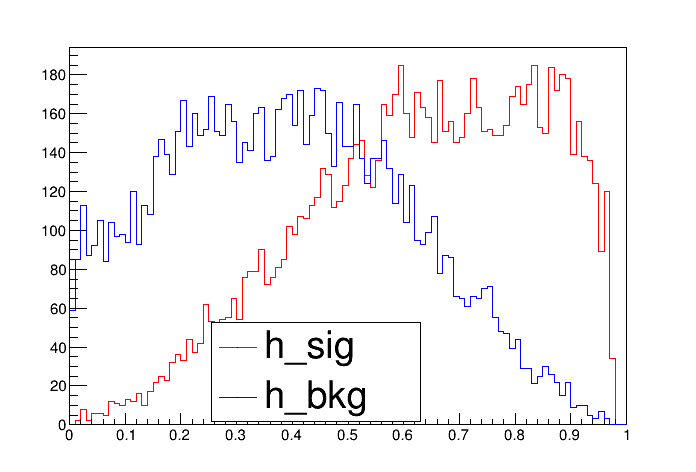

In [10]:
c1->Draw();